In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
base_path = '/home/kate/PycharmProjects/object_detection/archive/'

In [4]:
folders = os.listdir(base_path)

In [5]:
folders

['train_zip', 'test_zip']

In [6]:
train_files = os.listdir(base_path+folders[0]+'/'+'train'+'/') 

In [7]:
directory = base_path+folders[0]+'/'+'train'+'/'

In [8]:
train_images = filter(lambda x: x.endswith('.jpg'), train_files) #  фильтр файлов .jpg

In [9]:
xml_files = filter(lambda x: x.endswith('.xml'), train_files) # фильтр файлов .xml

In [10]:
data_xml_files = pd.DataFrame(xml_files)

In [11]:
data_xml_files = list(data_xml_files[0])

In [12]:
from xml.etree import ElementTree as et

In [13]:
labels = []
difficult = []
i = 0
dictionary = dict()
j = 0

for k in range(len(data_xml_files)):
    name = data_xml_files[k]
    annot_path = os.path.join(directory, name)
    tree = et.parse(os.path.join(directory, name))
    root = tree.getroot()
    width = root.find
    for member in root.findall('size'):
        width = int(member.find('width').text)
        height = int(member.find('height').text)
    # парсинг
    for member in root.findall('object'):
        i+=1
        label = member.find('name').text

        difficult = int(member.find('difficult').text)

        # bounding box
        xmin = int(member.find('bndbox').find('xmin').text)
        xmax = int(member.find('bndbox').find('xmax').text)

        ymin = int(member.find('bndbox').find('ymin').text)
        ymax = int(member.find('bndbox').find('ymax').text)
        annot_path= annot_path.replace('xml', 'jpg')

        if width != 0 and height !=0 :
            a = [annot_path, label, xmin/width, ymin/height, xmax/width, ymax/height, difficult] # деление на длину и ширину изображение для того, чтобы вписать рамки
            dictionary[i] = a # ключ - индекс, значение - характеристики картинки
        else:
            j+=1 # не учитываем те картинки, которые не открываются 

In [14]:
j

45

In [15]:
data = pd.DataFrame(dictionary)

In [16]:
data = data.T

In [17]:
data 

,0,1,2,3,4,5,6
1,/home/kate/PycharmProjects/object_detection/ar...,orange,0.063333,0.003125,0.575,0.934375,0
2,/home/kate/PycharmProjects/object_detection/ar...,orange,0.222857,0.225714,0.734286,0.711429,0
3,/home/kate/PycharmProjects/object_detection/ar...,banana,0.234375,0.315068,0.842448,0.853229,0
4,/home/kate/PycharmProjects/object_detection/ar...,banana,0.247396,0.195695,0.811198,0.645793,0
5,/home/kate/PycharmProjects/object_detection/ar...,banana,0.391993,0.238872,0.827356,0.734421,0
...,...,...,...,...,...,...,...
461,/home/kate/PycharmProjects/object_detection/ar...,banana,0.4875,0.071295,0.68,0.778612,0
462,/home/kate/PycharmProjects/object_detection/ar...,banana,0.063333,0.348,0.991667,0.816,0
463,/home/kate/PycharmProjects/object_detection/ar...,banana,0.042188,0.197802,0.814063,0.876374,0
464,/home/kate/PycharmProjects/object_detection/ar...,banana,0.425,0.21978,0.778125,0.840659,0


In [18]:
data = data.rename(columns={0: "image", 1: "class", 2: "xmin", 3: "ymin", 4: "xmax", 5: "ymax", 6: "difficult"})

In [19]:
data

,image,class,xmin,ymin,xmax,ymax,difficult
1,/home/kate/PycharmProjects/object_detection/ar...,orange,0.063333,0.003125,0.575,0.934375,0
2,/home/kate/PycharmProjects/object_detection/ar...,orange,0.222857,0.225714,0.734286,0.711429,0
3,/home/kate/PycharmProjects/object_detection/ar...,banana,0.234375,0.315068,0.842448,0.853229,0
4,/home/kate/PycharmProjects/object_detection/ar...,banana,0.247396,0.195695,0.811198,0.645793,0
5,/home/kate/PycharmProjects/object_detection/ar...,banana,0.391993,0.238872,0.827356,0.734421,0
...,...,...,...,...,...,...,...
461,/home/kate/PycharmProjects/object_detection/ar...,banana,0.4875,0.071295,0.68,0.778612,0
462,/home/kate/PycharmProjects/object_detection/ar...,banana,0.063333,0.348,0.991667,0.816,0
463,/home/kate/PycharmProjects/object_detection/ar...,banana,0.042188,0.197802,0.814063,0.876374,0
464,/home/kate/PycharmProjects/object_detection/ar...,banana,0.425,0.21978,0.778125,0.840659,0


In [20]:
import autogluon.core as ag
from autogluon.vision import ObjectDetector

/home/kate/.local/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.10.2+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '
2022-06-17 15:53:42.579455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 15:53:42.579492: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


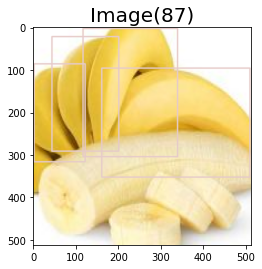

In [21]:
dataset = ObjectDetector.Dataset(data, classes=data['class'].unique().tolist())
dataset.show_images(nsample=1, ncol=1)

In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/awslabs/autogluon/issues/1559

The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Randomly split train_data into train[374]/validation[46] splits.
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.dataset         voc_tiny != auto
root.num_workers     4 != 12
root.valid.batch_size 16 != 6
root.gpus            (0, 1, 2, 3) != (0,)
root.train.epochs    20 != 2
root.train.seed      233 != 140
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 16 != 6
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_patience -1 != 10
root.ssd.data_shape  300 != 512
root.ssd.base_network vgg16_atrous != resnet50_v1
root.dataset_root    ~/.mxnet/datasets/ != auto
}
Saved config to /home/kate/PycharmProjects/object_detection/f77d9b6d/.trial_0/config.yaml
[16:11:42] ../src/imperative/./imperative_utils.h:93: GPU support is disabled. Compile MXNet with USE_CUDA=1 to enable GPU support.
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 99.336552, CrossEnt

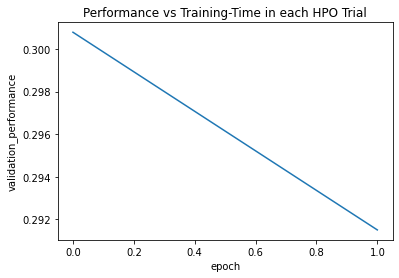

Finished, total runtime is 263.50 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 12,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.

In [22]:
time_limit = 60*30  # at most 0.5 hour
detector = ObjectDetector()
hyperparameters = {'epochs': 2, 'batch_size': 6}
hyperparameter_tune_kwargs={'num_trials': 2}
detector.fit(dataset, time_limit=time_limit, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

# Тестовые данные

In [33]:
directory = base_path+folders[1]+'/'+'test'+'/'

In [34]:
test_files = os.listdir(base_path+folders[1]+'/'+'test'+'/') 

In [35]:
test_images = filter(lambda x: x.endswith('.jpg'), test_files) #  фильтр файлов .jpg

In [36]:
xml_files = filter(lambda x: x.endswith('.xml'), test_files) # фильтр файлов .xml

In [37]:
data_xml_files = pd.DataFrame(xml_files)

In [38]:
data_xml_files = list(data_xml_files[0])

In [39]:
labels = []
difficult = []
i = 0
dictionary = dict()
j = 0

for k in range(len(data_xml_files)):
    name = data_xml_files[k]
    annot_path = os.path.join(directory, name)
    tree = et.parse(os.path.join(directory, name))
    root = tree.getroot()
    width = root.find
    for member in root.findall('size'):
        width = int(member.find('width').text)
        height = int(member.find('height').text)
    # парсинг
    for member in root.findall('object'):
        i+=1
        label = member.find('name').text

        difficult = int(member.find('difficult').text)

        # bounding box
        xmin = int(member.find('bndbox').find('xmin').text)
        xmax = int(member.find('bndbox').find('xmax').text)

        ymin = int(member.find('bndbox').find('ymin').text)
        ymax = int(member.find('bndbox').find('ymax').text)
        annot_path= annot_path.replace('xml', 'jpg')

        if width != 0 and height !=0 :
            a = [annot_path, label, xmin/width, ymin/height, xmax/width, ymax/height, difficult] # деление на длину и ширину изображение для того, чтобы вписать рамки
            dictionary[i] = a # ключ - индекс, значение - характеристики картинки
        else:
            j+=1 # не учитываем те картинки, которые не открываются 

In [40]:
j

7

In [41]:
data_test = pd.DataFrame(dictionary)

In [42]:
data_test = data_test.T

In [43]:
data_test

,0,1,2,3,4,5,6
1,/home/kate/PycharmProjects/object_detection/ar...,banana,0.448753,0.138889,0.858726,0.983333,0
2,/home/kate/PycharmProjects/object_detection/ar...,banana,0.224377,0.044444,0.609418,0.966667,0
3,/home/kate/PycharmProjects/object_detection/ar...,banana,0.222222,0.142222,0.846667,0.422222,0
4,/home/kate/PycharmProjects/object_detection/ar...,banana,0.211111,0.622222,0.844444,0.9,0
5,/home/kate/PycharmProjects/object_detection/ar...,orange,0.097333,0.182384,0.328667,0.52847,0
...,...,...,...,...,...,...,...
112,/home/kate/PycharmProjects/object_detection/ar...,banana,0.279671,0.161088,0.87309,0.615063,0
113,/home/kate/PycharmProjects/object_detection/ar...,apple,0.089583,0.279167,0.745833,0.947917,0
114,/home/kate/PycharmProjects/object_detection/ar...,orange,0.446154,0.07874,0.933333,0.783465,0
115,/home/kate/PycharmProjects/object_detection/ar...,banana,0.096667,0.030556,0.82,0.966667,0


In [44]:
data_test = data_test.rename(columns={0: "image", 1: "class", 2: "xmin", 3: "ymin", 4: "xmax", 5: "ymax", 6: "difficult"})

In [45]:
data_test

,image,class,xmin,ymin,xmax,ymax,difficult
1,/home/kate/PycharmProjects/object_detection/ar...,banana,0.448753,0.138889,0.858726,0.983333,0
2,/home/kate/PycharmProjects/object_detection/ar...,banana,0.224377,0.044444,0.609418,0.966667,0
3,/home/kate/PycharmProjects/object_detection/ar...,banana,0.222222,0.142222,0.846667,0.422222,0
4,/home/kate/PycharmProjects/object_detection/ar...,banana,0.211111,0.622222,0.844444,0.9,0
5,/home/kate/PycharmProjects/object_detection/ar...,orange,0.097333,0.182384,0.328667,0.52847,0
...,...,...,...,...,...,...,...
112,/home/kate/PycharmProjects/object_detection/ar...,banana,0.279671,0.161088,0.87309,0.615063,0
113,/home/kate/PycharmProjects/object_detection/ar...,apple,0.089583,0.279167,0.745833,0.947917,0
114,/home/kate/PycharmProjects/object_detection/ar...,orange,0.446154,0.07874,0.933333,0.783465,0
115,/home/kate/PycharmProjects/object_detection/ar...,banana,0.096667,0.030556,0.82,0.966667,0


In [46]:
image_path = data_test.iloc[0]['image']
result = detector.predict(image_path)
print(result)

   predict_class  predict_score  \
0         orange       0.681068   
1         orange       0.564877   
2         orange       0.380509   
3         banana       0.302751   
4         banana       0.261119   
..           ...            ...   
58        orange       0.081108   
59        banana       0.080222   
60        banana       0.080037   
61        banana       0.079205   
62         apple       0.078849   

                                         predict_rois  
0   {'xmin': 0.4152657687664032, 'ymin': 0.3035208...  
1   {'xmin': 0.6761890053749084, 'ymin': 0.1235207...  
2   {'xmin': 0.4320105314254761, 'ymin': 0.7656920...  
3   {'xmin': 0.5490795373916626, 'ymin': 0.1211835...  
4   {'xmin': 0.016994543373584747, 'ymin': 0.0, 'x...  
..                                                ...  
58  {'xmin': 0.024371394887566566, 'ymin': 0.33646...  
59  {'xmin': 0.041539035737514496, 'ymin': 0.05364...  
60  {'xmin': 0.263875275850296, 'ymin': 0.45255941...  
61  {'xmin': 0.1022

In [47]:
bulk_result = detector.predict(data_test)
print(bulk_result)

     predict_class  predict_score  \
0           orange       0.681068   
1           orange       0.564877   
2           orange       0.380509   
3           banana       0.302751   
4           banana       0.261119   
...            ...            ...   
6275        orange       0.059645   
6276        banana       0.059290   
6277        banana       0.058909   
6278        banana       0.058589   
6279        banana       0.058140   

                                           predict_rois  \
0     {'xmin': 0.4152657687664032, 'ymin': 0.3035208...   
1     {'xmin': 0.6761890053749084, 'ymin': 0.1235207...   
2     {'xmin': 0.4320105314254761, 'ymin': 0.7656920...   
3     {'xmin': 0.5490795373916626, 'ymin': 0.1211835...   
4     {'xmin': 0.016994543373584747, 'ymin': 0.0, 'x...   
...                                                 ...   
6275  {'xmin': 0.21845193207263947, 'ymin': 0.203519...   
6276  {'xmin': 0.059856630861759186, 'ymin': 0.0, 'x...   
6277  {'xmin': 0.1807060